<img src="https://upload.wikimedia.org/wikipedia/de/thumb/5/5b/Hochschule-aalen.svg/2000px-Hochschule-aalen.svg.png" alt="last access: 29.09.2021" width="400" height="30" style="float:right"/>

<img src="https://upload.wikimedia.org/wikipedia/de/thumb/4/41/Groupe_SEB_logo.svg/1200px-Groupe_SEB_logo.svg.png" alt="last access: 11.09.2022" width="30" height="30" style="float:left"/>

<hr style="height:2px;border:none;color:#003A6C;background-color:#003A6C;" />


Master Thesis Jessica Weiler, M.Sc. Data Science and Business Analytics 

# Image aesthetics assessment (IAA) of food and beverages using deep learning



## Testcase 3: Vanilla Modeling
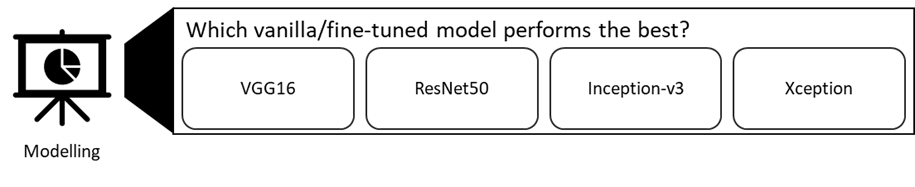

Four state-of-the-art vanilla models (weights=None) are initialized. 

### Load libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import os
import PIL
import PIL.Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import time
import datetime

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, Xception, ResNet50, inception_v3
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
# Image processing / Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras




### Set Paths

In [ ]:
#Set paths

#Set workdir
wpth =os.path.abspath(os.getcwd()).replace("\\","/")

#Save data save path
save_data_dir = os.path.join(wpth, 'Saved_Data').replace("\\","/")
checkpoint_dir=  os.path.join(save_data_dir, 'Checkpoint').replace("\\","/")
df_model_histor_dir=  os.path.join(save_data_dir, 'df_model_history').replace("\\","/")


#Set folderpath RIAA 
RIAA_pth = os.path.join(wpth, 'Dataset','RIAA').replace("\\","/")

RIAA_train_pth = os.path.join(RIAA_pth, 'Data_Split', 'train').replace("\\","/")
RIAA_test_pth = os.path.join(RIAA_pth, 'Data_Split', 'test').replace("\\","/")
RIAA_val_pth = os.path.join(RIAA_pth, 'Data_Split', 'val').replace("\\","/")

RIAA_224_train_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'train').replace("\\","/")
RIAA_224_test_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'test').replace("\\","/")
RIAA_224_val_pth = os.path.join(RIAA_pth, 'Data_Split_224', 'val').replace("\\","/")

RIAA_224_binary_balanced_train_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'train').replace("\\","/")
RIAA_224_binary_balanced_test_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'test').replace("\\","/")
RIAA_224_binary_balanced_val_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_Balanced_224', 'val').replace("\\","/")

RIAA_224_binary_warped_train_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'train').replace("\\","/")
RIAA_224_binary_warped_test_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'test').replace("\\","/")
RIAA_224_binary_warped_val_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_224', 'val').replace("\\","/")

RIAA_224_binary_cropped_train_pth = os.path.join(RIAA_pth, 'Data_Split_Resized_Cropped_224', 'train').replace("\\","/")
RIAA_224_binary_cropped_test_pth = os.path.join(RIAA_pth, 'Data_Split_Resized_Cropped_224', 'test').replace("\\","/")
RIAA_224_binary_cropped_val_pth = os.path.join(RIAA_pth, 'Data_Split_Resized_Cropped_224', 'val').replace("\\","/")

RIAA_299_binary_warped_train_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'train').replace("\\","/")
RIAA_299_binary_warped_test_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test').replace("\\","/")
RIAA_299_binary_warped_val_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'val').replace("\\","/")


#Set folderpath GPD 
GPD_pth = os.path.join(wpth, 'Dataset', 'GPD').replace("\\","/")

GPD_test_pth = os.path.join(GPD_pth, 'Data').replace("\\","/")

## Preparation of RIAA

In [ ]:
#import splitfolders
#splitfolders.ratio(os.path.join(RIAA_pth, 'Resized_Cropped_224').replace("\\","/"), output=os.path.join(RIAA_pth, 'Data_Split_Resized_Cropped_224'), seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)
datagen_test = ImageDataGenerator(rescale = 1./255)

## Modeling

In [ ]:
#EarlyStop
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
seed_value = 42

### VGG16 Base Model

In [ ]:
image_size=224

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_224_binary_warped_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_224_binary_warped_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_warped_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
vgg16_obj = VGG16(include_top = False, weights=None,input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
#for layer in vgg16_obj.layers:             # Off the training of the trainable parameters
#    layer.trainable = False
vgg16_obj.summary()

In [ ]:
vgg16_obj.output

In [ ]:
num_classes=2
image_size=224

In [ ]:
last_layer = vgg16_obj.get_layer('block5_pool')
last_output = vgg16_obj.output

x = Flatten()(last_output)
x = tf.keras.layers.Dense(4096, activation='relu')(x) #, kernel_initializer=tf.keras.initializers.glorot_normal(seed=seed_value),
                 # bias_initializer=tf.keras.initializers.Zeros()
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(vgg16_obj.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_vgg16_base_model-{epoch:03d}-{accuracy:.3f}-{val_accuracy:.3f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
start_time = time.time()

In [ ]:
vgg_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback], epochs=1000)

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))



In [ ]:
#save model history
df_history =pd.DataFrame(vgg_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'df_history_vanilla_vgg16_base_model.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(vgg_classifier.history['accuracy'])
plt.plot(vgg_classifier.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(vgg_classifier.history['loss'])
plt.plot(vgg_classifier.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality

In [ ]:
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round() 
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation VGG16 base model')

### Resnet50

In [ ]:
num_classes=2
image_size=224

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_224_binary_warped_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_224_binary_warped_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_224_binary_warped_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
resnet50_obj = ResNet50(include_top = False, weights=None,input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
#for layer in resnet50_obj.layers:             # Off the training of the trainable parameters
#    layer.trainable = False
resnet50_obj.summary()

In [ ]:
resnet50_obj.output

In [ ]:
last_layer = resnet50_obj.get_layer('conv5_block3_out')
last_output = resnet50_obj.output

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
#x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(resnet50_obj.input, x)

In [ ]:
model.summary()

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_Resnet50_base_model-{epoch:03d}-{accuracy:.3f}-{val_accuracy:.3f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#EarlyStop
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()

In [ ]:
resnet50_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback ], epochs=1000)

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))


In [ ]:
#save model history
df_history =pd.DataFrame(resnet50_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'df_history_vanilla_resnet50_base_model.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(resnet50_classifier.history['val_accuracy'])
plt.plot(resnet50_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')



In [ ]:
plt.plot(resnet50_classifier.history['val_loss'])
plt.plot(resnet50_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round() #round_pred#np.argmax(round_pred, axis=1)
#true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation ResNet50 base model')

### Inception v3

In [ ]:
image_size=299

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_299_binary_warped_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_299_binary_warped_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_299_binary_warped_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
inceptionv3_obj = InceptionV3(include_top = False, input_shape = (299,299,3), weights=None)    #  include_top = False is used to skip the layer from flattern
inceptionv3_obj.summary()

In [ ]:
inceptionv3_obj.output

In [ ]:
last_layer = inceptionv3_obj.get_layer('mixed10')
last_output = inceptionv3_obj.output

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(inceptionv3_obj.input, x)

In [ ]:
model.summary()

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_InceptionV3_base_model-{epoch:03d}-{accuracy:.3f}-{val_accuracy:.3f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#EarlyStop
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()

In [ ]:
inceptionv3_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback ], epochs=1000) 

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))


In [ ]:
#save model history
df_history =pd.DataFrame(inceptionv3_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'vanilla_inceptionv3_classifier_base_model.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(inceptionv3_classifier.history['val_accuracy'])
plt.plot(inceptionv3_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(inceptionv3_classifier.history['val_loss'])
plt.plot(inceptionv3_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round()
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
            
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation Inceptionv3 base model')

### Xception

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)

In [ ]:
# load and iterate dataset
train_data = datagen.flow_from_directory(RIAA_299_binary_warped_train_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=True, seed=seed_value)
val_data = datagen_test.flow_from_directory(RIAA_299_binary_warped_val_pth, class_mode='binary',target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )
test_data = datagen_test.flow_from_directory(RIAA_299_binary_warped_test_pth, class_mode='binary', target_size=(image_size, image_size),batch_size=32, shuffle=False, seed=seed_value )

In [ ]:
Xception_obj = Xception(include_top = False, input_shape = (299,299,3), weights=None)    #  include_top = False is used to skip the layer from flattern
Xception_obj.summary()

In [ ]:
Xception_obj.output

In [ ]:
last_layer = Xception_obj.get_layer('block14_sepconv2_act')
last_output = Xception_obj.output

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
#Merge
model = tf.keras.Model(Xception_obj.input, x)

In [ ]:
model.summary()

In [ ]:
checkpoint_model_dir=  os.path.join(checkpoint_dir, 'vanilla_Xception_base_model-{epoch:03d}-{accuracy:.3f}-{val_accuracy:.3f}.h5').replace("\\","/")

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#EarlyStop
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
    nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()

In [ ]:
xception_classifier = model.fit(train_data, validation_data=val_data, verbose=1,  callbacks=[callback_earlystop, checkpoint_callback ], epochs=1000) 

In [ ]:
stop_time = time.time()
time_delta=stop_time - start_time
print("--- %s seconds ---" % (stop_time - start_time))
str(datetime.timedelta(seconds=time_delta))


In [ ]:
#save model history
df_history =pd.DataFrame(xception_classifier.history)
model_history_dir=  os.path.join(df_model_histor_dir, 'xception_classifier_base_model.csv').replace("\\","/")
df_history.to_csv(model_history_dir)

In [ ]:
plt.plot(xception_classifier.history['val_accuracy'])
plt.plot(xception_classifier.history['accuracy'])
plt.legend(['val','train'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(xception_classifier.history['val_loss'])
plt.plot(xception_classifier.history['loss'])
plt.legend(['val','train'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pd.DataFrame(classification_report(test_data.classes, pred > 0.5, output_dict=True))

In [ ]:
true_classes = test_data.classes

In [ ]:
reality = [0 if x > 0.5 else 1 for x in true_classes]
#reality
predictions = [0 if x > 0.5 else 1 for x in pred]
#predictions

In [ ]:
accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

In [ ]:
predicted_classes = pred.round()
class_labels = list(test_data.class_indices.keys())

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
sns.heatmap(cm, annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
            
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation Xception base model')

### Plot classified images

In [ ]:
pred = model_inceptionv3.predict(test_data)

In [ ]:
right_pred_list= []
wrong_pred_list= []
classes=list(test_data.class_indices.keys())

In [ ]:
for i in range(1809):
    if int(pred[i].round())==test_data.classes[i]:
        right_pred_list.append(i)   
    else:
        wrong_pred_list.append(i)

In [ ]:
import random
random.shuffle(right_pred_list)
random.shuffle(wrong_pred_list)

In [ ]:

plt.figure(figsize=(20, 10))

for i in range(12):
    element= right_pred_list[i]
    plt.subplot(3, 4, i + 1)
    img_url=test_data.filenames[element]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    title_text= classes[int(pred[element].round())]
    #f'Pred: {int(pred[element].round())}, True: {test_data.classes[element]}'
    
    if int(pred[element].round())==test_data.classes[element]:
        color='g'
    else:
        color='r'
    
    img = plt.imread(full_img_pth)
    plt.imshow(img, cmap='jet')
    plt.title(title_text, color=color) 
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(12):
    element= wrong_pred_list[i]
    plt.subplot(3, 4, i + 1)
    img_url=test_data.filenames[element]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    title_text=f' Prediction: {classes[int(pred[element].round())]}'
    #f'Pred: {int(pred[element].round())}, True: {test_data.classes[element]}'
    
    if int(pred[element].round())==test_data.classes[element]:
        color='g'
    else:
        color='r'
    
    img = plt.imread(full_img_pth)
    plt.imshow(img, cmap='jet')
    plt.title(title_text, color=color) 
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
number=7
specific_img_element=wrong_pred_list[number]
img_url=test_data.filenames[specific_img_element]
full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")

In [ ]:
img = plt.imread(full_img_pth)
plt.imshow(img, cmap='jet') 
pred_value_round=[ '%.4f' % elem for elem in pred[specific_img_element]]
title_text= f'Prediction:  {100-(float(pred_value_round[0])* 100)} % for {classes[int(pred[element].round())]} \n True class:  {classes[test_data.classes[element]]}                         .'
#f'Prediction: {pred_value_round[0]}≈{int(pred[specific_img_element].round())}, True Class: {test_data.classes[specific_img_element]}'
plt.title(title_text, color='black')
plt.axis('off')

In [ ]:
number=5
specific_img_element=wrong_pred_list[number]
img_url=test_data.filenames[specific_img_element]
full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")

In [ ]:
img = plt.imread(full_img_pth)
plt.imshow(img, cmap='jet') 
pred_value_round=[ '%.4f' % elem for elem in pred[specific_img_element]]
title_text= f'Prediction:  {100-(float(pred_value_round[0])* 100)} % for {classes[int(pred[element].round())]} \n True class:  {classes[test_data.classes[element]]}                        .'
#f'Prediction: {pred_value_round[0]}≈{int(pred[specific_img_element].round())}, True Class: {test_data.classes[specific_img_element]}'
plt.title(title_text, color='black')
plt.axis('off')

In [ ]:
number=11
specific_img_element=wrong_pred_list[number]
img_url=test_data.filenames[specific_img_element]
full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")

In [ ]:
img = plt.imread(full_img_pth)
plt.imshow(img, cmap='jet') 
pred_value_round=[ '%.4f' % elem for elem in pred[specific_img_element]]
title_text= f'Prediction:  {100 - (float(pred_value_round[0]) *100)} % for {classes[int(pred[element].round())]} \n    True class:  {classes[test_data.classes[element]]}                          .'
#f'Prediction: {pred_value_round[0]}≈{int(pred[specific_img_element].round())}, True Class: {test_data.classes[specific_img_element]}'
plt.title(title_text, color='black')
plt.axis('off')

### Test on boarderline images

In [ ]:
RIAA_299_warped_boarderline_pth= os.path.join(r'.\RIAA\Data_Split_299\train\2_NotSure').replace("\\","/")

In [ ]:
from keras.preprocessing import image
#https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras 05.12.2022

def load_image(img_path, size):

    img = image.load_img(img_path, target_size=(size,size))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor


In [ ]:
from glob import glob

path= os.path.join(RIAA_299_warped_boarderline_pth, '*').replace("\\","/")
some_boarderline_images = glob(path, recursive = True)

In [ ]:
plt.figure(figsize=(20, 10))

#pred_value_round=[ '%.4f' % elem for elem in pred[0]]

for i in range(12):
    
    plt.subplot(3, 4, i + 1)
    img_url=some_boarderline_images[i]
    #full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_299', 'test', img_url).replace("\\","/")
    img_tensor= load_image(img_url,299)
    pred = model.predict(img_tensor)
    pred_value_round=[ '%.4f' % elem for elem in pred[0]]
    title_text= f'Pred: {pred_value_round[0]}≈{int(pred[0].round())} '    
    img = plt.imread(img_url)
    plt.imshow(img, cmap='jet')
    plt.title(title_text) 
    plt.axis('off')
    
plt.tight_layout()

### Evaluation summary

In [ ]:
#loading best models
model_vgg16 = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vanilla_vgg16_base_model-027-0.788-0.807.h5').replace("\\","/"))
model_resnet50 = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vanilla_Resnet50_base_model-013-0.790-0.791.h5').replace("\\","/"))
model_inceptionv3 = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vanilla_InceptionV3_base_model-020-0.810-0.807.h5').replace("\\","/"))
model_xception = tf.keras.models.load_model(os.path.join(checkpoint_dir, 'vanilla_Xception_base_model-006-0.797-0.804.h5').replace("\\","/"))

In [ ]:
test_cases = ["vgg16",  "resnet50", "inceptionv3", "xception"]
image_size = [224, 224, 299, 299]
seed_value=42

In [ ]:
for j,i in enumerate(test_cases):
    print('---------- %s ----------' % i)
    
    # load and iterate dataset
    train_data = datagen.flow_from_directory(globals()["RIAA_" + str(image_size[j]) + "_binary_warped_train_pth"], class_mode='binary', target_size=(image_size[j], image_size[j]),batch_size=32, shuffle=True, seed=seed_value)
    val_data = datagen_test.flow_from_directory(globals()["RIAA_" + str(image_size[j]) + "_binary_warped_val_pth"], class_mode='binary',target_size=(image_size[j], image_size[j]),batch_size=32, shuffle=False, seed=seed_value)
    test_data = datagen_test.flow_from_directory(globals()["RIAA_" + str(image_size[j])+ "_binary_warped_test_pth"], class_mode='binary', target_size=(image_size[j], image_size[j]),batch_size=32, shuffle=False, seed=seed_value )
    generalization_test = datagen_test.flow_from_directory(GPD_test_pth, class_mode='binary', target_size=(image_size[j], image_size[j]),batch_size=32, shuffle=False, seed=seed_value )
    
    globals()["Eval_train_"+"model_"+str(i)] = globals()["model_"+str(i)].evaluate(train_data)
    globals()["Eval_val_"+"model_"+str(i)] = globals()["model_"+str(i)].evaluate(val_data)
    globals()["Eval_test_"+"model_"+str(i)] =globals()["model_"+str(i)].evaluate(test_data)
    globals()["Eval_gentest_"+"model_"+str(i)] =globals()["model_"+str(i)].evaluate(generalization_test)
    print('---------------------------------------------------------------' )
    
    print('Train accuracy')
    print(format(globals()["Eval_train_"+"model_"+str(i)][1], '.4f'))
    print('----------')
    
    print('Validation accuracy')
    print(format(globals()["Eval_val_"+"model_"+str(i)][1], '.4f'))
    print('Test accuracy')
    print(format(globals()["Eval_test_"+"model_"+str(i)][1], '.4f'))
    print('Test accuracy on GPD dataset')
    print(format(globals()["Eval_gentest_"+"model_"+str(i)][1], '.4f'))
    print('----------')
    
    globals()["true_classes_"+"model_"+str(i)] = test_data.classes
    #globals()["reality"+"vgg16_model_"+str(i)] = [0 if x > 0.5 else 1 for x in globals()["true_classes_"+"vgg16_model_"+str(i)]]
    globals()["pred"+"model_"+str(i)] =  globals()["model_"+str(i)].predict(test_data)
    globals()["pred"+"model_GPD"+str(i)] =  globals()["model_"+str(i)].predict(generalization_test)
    #globals()["predictions"+"vgg16_model_"+str(i)] = [0 if x > 0.5 else 1 for x in globals()["pred"+"vgg16_model_"+str(i)]]
    globals()["predicted_classes"+"model_"+str(i)] = globals()["pred"+"model_"+str(i)].round()
    globals()["cm"+"model_"+str(i)] = confusion_matrix(globals()["true_classes_"+"model_"+str(i)], globals()["predicted_classes"+"model_"+str(i)])
    
    print('TrueNegative accuracy')
    TrueNegative=globals()["cm"+"model_"+str(i)][0][0]/(globals()["cm"+"model_"+str(i)][0][1]+globals()["cm"+"model_"+str(i)][0][0])
    print(format(TrueNegative, '.4f'))
    print('TruePositive accuracy')
    TruePositive=globals()["cm"+"model_"+str(i)][1][1]/(globals()["cm"+"model_"+str(i)][1][0]+globals()["cm"+"model_"+str(i)][1][1])
    print(format(TruePositive, '.4f'))
    print('Balanced accuracy')
    print(format((0.5*TrueNegative)+(0.5*TruePositive), '.4f'))
    
    sns.heatmap(globals()["cm"+"model_"+str(i)], annot= True, xticklabels = ['Pred: 0_Unaesthetic', 'Pred: 1_Aesthetic'],
           yticklabels = ['True: 0_Unaesthetic', 'True: 1_Aesthetic'], cmap='Blues', fmt='g').set_title('Evaluation ' + str(i) + ' model')
    plt.show()


In [ ]:
plt.figure(figsize=(20, 10))

for i in range(12):
    element= wrong_pred_list[i]
    plt.subplot(3, 4, i + 1)
    img_url=test_data.filenames[element]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    title_text=f' Prediction: {classes[int(pred[element].round())]}'
    #f'Pred: {int(pred[element].round())}, True: {test_data.classes[element]}'
    
    if int(pred[element].round())==test_data.classes[element]:
        color='g'
    else:
        color='r'
    
    img = plt.imread(full_img_pth)
    plt.imshow(img, cmap='jet')
    plt.title(title_text, color=color) 
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
for j in range (50):
    img_url=test_data.filenames[j]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    print(full_img_pth)
    img = plt.imread(full_img_pth)
    title_text= f'{classes[test_data.classes[j]]}'
    plt.imshow(img, cmap='jet')
    print(title_text)
    #plt.title(title_text) 
    plt.axis('off')
    plt.show()
    for i in test_cases:
        print("pred"+"model_"+str(i))
        print(globals()["pred"+"model_"+str(i)][j])
    

In [ ]:
test_matrix=np.column_stack((predmodel_vgg16, predmodel_resnet50, predmodel_inceptionv3, predmodel_xception))

In [ ]:
list_0_1=[]

In [ ]:
for i in range(len(test_matrix)):
    #for j in (test_matrix[0]):
    if test_matrix[i][1] > 0.5 and  test_matrix[i][2] > 0.5 and  test_matrix[i][3] > 0.5 and  test_matrix[i][0] > 0.5:
        list_0_1.append(1)
    elif test_matrix[i][1] <= 0.5 and  test_matrix[i][2] <= 0.5 and  test_matrix[i][3] <= 0.5 and  test_matrix[i][0] <= 0.5:
        list_0_1.append(0)
    else:
         list_0_1.append('N/A')


In [ ]:
test_list_true=[]
test_list_false=[]
classes=list(test_data.class_indices.keys())

In [ ]:
for i in range(len(test_matrix)):
    if list_0_1[i] == test_data.classes[i]:
        test_list_true.append(i)
    elif list_0_1[i] != 'N/A':
        test_list_false.append(i)

In [ ]:
import random
random.shuffle(test_list_true)
random.shuffle(test_list_false)

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(12):
    element= test_list_true[i]
    plt.subplot(3, 4, i + 1)
    img_url=test_data.filenames[element]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    title_text= classes[int(predmodel_vgg16[element].round())]

    
    if int(pred[element].round())==test_data.classes[element]:
        color='g'
    else:
        color='r'
    
    img = plt.imread(full_img_pth)
    plt.imshow(img, cmap='jet')
    plt.title(title_text, color=color) 
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(12):
    element= test_list_false[i]
    plt.subplot(3, 4, i + 1)
    img_url=test_data.filenames[element]
    full_img_pth = os.path.join(RIAA_pth, 'Data_Split_Binary_300', 'test', img_url).replace("\\","/")
    title_text= f'Prediction: {classes[int(predmodel_resnet50[element].round())]}'
    #f'Pred: {int(pred[element].round())}, True: {test_data.classes[element]}'
    
    if int(predmodel_resnet50[element].round())==test_data.classes[element]:
        color='g'
    else:
        color='r'
    
    img = plt.imread(full_img_pth)
    plt.imshow(img, cmap='jet')
    plt.title(title_text, color=color) 
    plt.axis('off')
    
plt.tight_layout()

### Generalization Test on GPD

In [ ]:
for j in range (50):
    img_url=generalization_test.filenames[-j]
    full_img_pth = os.path.join(GPD_test_pth, img_url).replace("\\","/")
    print(full_img_pth)
    img = plt.imread(full_img_pth)
    title_text= f'{classes[generalization_test.classes[-j]]}'
    plt.imshow(img, cmap='jet')
    print(title_text)
    #plt.title(title_text) 
    plt.axis('off')
    plt.show()
    for i in test_cases:
        print("pred"+"model_GPD"+str(i))
        print(globals()["pred"+"model_GPD"+str(i)][-j])